Step 1: 클래스별 데이터 수량 분석을 시작합니다.

[분석 결과 1-1: 기본 통계]
총 클래스 수: 396
총 이미지 수: 33137

클래스별 이미지 수 통계:
count    396.000000
mean      83.679293
std        4.887149
min       57.000000
25%       82.000000
50%       85.000000
75%       87.000000
max       90.000000
Name: image_count, dtype: float64

[분석 결과 1-2: 데이터가 가장 많은 Top 10 클래스]
                 class_name  image_count
394      프리우스_4세대_2019_2022           90
390       파일럿_3세대_2016_2018           88
389     파사트_GT_B8_2018_2022           88
370       쿠퍼_컨트리맨_2012_2015           88
367        콰트로포르테_2014_2016           88
350  일렉트리파이드_GV70_2022_2024           88
347         익스플로러_2016_2017           88
29       7시리즈_G11_2019_2022           88
9        3시리즈_F30_2013_2018           88
8        3시리즈_E90_2005_2012           88

[분석 결과 1-3: 데이터가 가장 적은 Top 10 클래스]
                     class_name  image_count
99       K5_3세대_하이브리드_2020_2022           57
193             뉴_QM6_2021_2023           59
250        디_올_뉴_스포티지_2022_2024           60
5    2시리

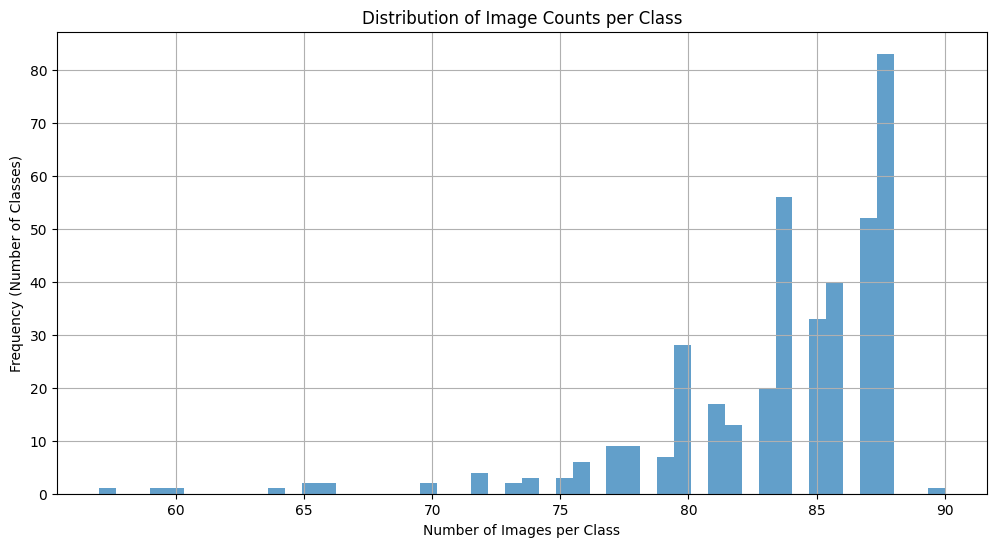


[분석 결과 1-4: 클래스별 데이터 분포 그래프]
위에 'Distribution of Image Counts per Class' 제목의 그래프가 나타납니다.
그래프가 왼쪽으로 심하게 치우쳐져 있다면, 데이터 불균형이 심각하다는 의미입니다.


In [1]:
import os
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# --------------------------------------------------------------------------
# [사용자 설정] train 폴더가 있는 경로를 정확하게 입력해주세요.
# 예: "C:/Users/MyUser/Desktop/car_competition/train"
# --------------------------------------------------------------------------
TRAIN_DATA_PATH = "./train"  # train 폴더의 경로를 입력하세요.

# --- 아래 코드는 수정할 필요 없습니다. ---

print("Step 1: 클래스별 데이터 수량 분석을 시작합니다.")

if not os.path.exists(TRAIN_DATA_PATH):
    print(f"!!! 경로를 찾을 수 없습니다: {TRAIN_DATA_PATH}")
    print("!!! TRAIN_DATA_PATH 변수에 올바른 train 폴더 경로를 입력했는지 확인해주세요.")
else:
    class_names = [d for d in os.listdir(TRAIN_DATA_PATH) if os.path.isdir(os.path.join(TRAIN_DATA_PATH, d))]
    
    image_counts = {}
    for class_name in class_names:
        class_path = os.path.join(TRAIN_DATA_PATH, class_name)
        num_images = len([f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
        image_counts[class_name] = num_images

    class_counts_df = pd.DataFrame(list(image_counts.items()), columns=['class_name', 'image_count'])
    
    print("\n[분석 결과 1-1: 기본 통계]")
    print(f"총 클래스 수: {len(class_names)}")
    print(f"총 이미지 수: {class_counts_df['image_count'].sum()}")
    print("\n클래스별 이미지 수 통계:")
    print(class_counts_df['image_count'].describe())
    
    print("\n[분석 결과 1-2: 데이터가 가장 많은 Top 10 클래스]")
    print(class_counts_df.sort_values(by='image_count', ascending=False).head(10))
    
    print("\n[분석 결과 1-3: 데이터가 가장 적은 Top 10 클래스]")
    print(class_counts_df.sort_values(by='image_count', ascending=True).head(10))

    # 클래스별 데이터 수량 분포 시각화
    plt.figure(figsize=(12, 6))
    plt.hist(class_counts_df['image_count'], bins=50, alpha=0.7)
    plt.title('Distribution of Image Counts per Class')
    plt.xlabel('Number of Images per Class')
    plt.ylabel('Frequency (Number of Classes)')
    plt.grid(True)
    plt.show()
    print("\n[분석 결과 1-4: 클래스별 데이터 분포 그래프]")
    print("위에 'Distribution of Image Counts per Class' 제목의 그래프가 나타납니다.")
    print("그래프가 왼쪽으로 심하게 치우쳐져 있다면, 데이터 불균형이 심각하다는 의미입니다.")

In [2]:
# --- 1단계 코드에서 생성된 class_names 리스트를 그대로 사용합니다. ---

print("\nStep 2: '동일 클래스' 대상 폴더 존재 여부 확인을 시작합니다.")

# 규칙에 명시된 동일 클래스 쌍
merge_candidates = [
    'K5_3세대_하이브리드_2020_2022', 'K5_하이브리드_3세대_2020_2023',
    '디_올뉴니로_2022_2025', '디_올_뉴_니로_2022_2025',
    '718_박스터_2017_2024', '박스터_718_2017_2024',
    'RAV4_2016_2018', '라브4_4세대_2013_2018',
    'RAV4_5세대_2019_2024', '라브4_5세대_2019_2024'
]

found_count = 0
if 'class_names' in locals():
    for candidate in merge_candidates:
        if candidate in class_names:
            print(f"- [확인] '{candidate}' 폴더가 존재합니다. (이미지 수: {image_counts.get(candidate, 'N/A')})")
            found_count += 1
        else:
            print(f"- [누락] '{candidate}' 폴더를 찾을 수 없습니다.")

    print(f"\n총 {len(merge_candidates)}개의 병합 대상 후보 중 {found_count}개를 train 폴더에서 확인했습니다.")
    print("모두 '확인'으로 나와야 클래스 병합 전략을 사용할 수 있습니다.")

else:
    print("!!! 1단계 코드를 먼저 실행해주세요.")


Step 2: '동일 클래스' 대상 폴더 존재 여부 확인을 시작합니다.
- [확인] 'K5_3세대_하이브리드_2020_2022' 폴더가 존재합니다. (이미지 수: 57)
- [확인] 'K5_하이브리드_3세대_2020_2023' 폴더가 존재합니다. (이미지 수: 87)
- [확인] '디_올뉴니로_2022_2025' 폴더가 존재합니다. (이미지 수: 87)
- [확인] '디_올_뉴_니로_2022_2025' 폴더가 존재합니다. (이미지 수: 84)
- [확인] '718_박스터_2017_2024' 폴더가 존재합니다. (이미지 수: 85)
- [확인] '박스터_718_2017_2024' 폴더가 존재합니다. (이미지 수: 84)
- [확인] 'RAV4_2016_2018' 폴더가 존재합니다. (이미지 수: 72)
- [확인] '라브4_4세대_2013_2018' 폴더가 존재합니다. (이미지 수: 88)
- [확인] 'RAV4_5세대_2019_2024' 폴더가 존재합니다. (이미지 수: 88)
- [확인] '라브4_5세대_2019_2024' 폴더가 존재합니다. (이미지 수: 85)

총 10개의 병합 대상 후보 중 10개를 train 폴더에서 확인했습니다.
모두 '확인'으로 나와야 클래스 병합 전략을 사용할 수 있습니다.



Step 3: 이미지 속성 분석을 시작합니다 (샘플링).
각 클래스에서 이미지 1장씩을 샘플링하여 분석 중입니다. 잠시 기다려주세요...

[분석 결과 3-1: 이미지 해상도 통계]
             width      height  aspect_ratio
count   396.000000  396.000000    396.000000
mean    682.290404  441.239899      1.570090
std     147.645141   73.258036      0.365992
min     204.000000  156.000000      0.604651
25%     557.750000  399.000000      1.272140
50%     659.000000  433.000000      1.475795
75%     823.250000  477.000000      1.878238
max    1017.000000  766.000000      2.617486

[분석 결과 3-2: 이미지 컬러 모드 분포]
mode
RGB    396
Name: count, dtype: int64


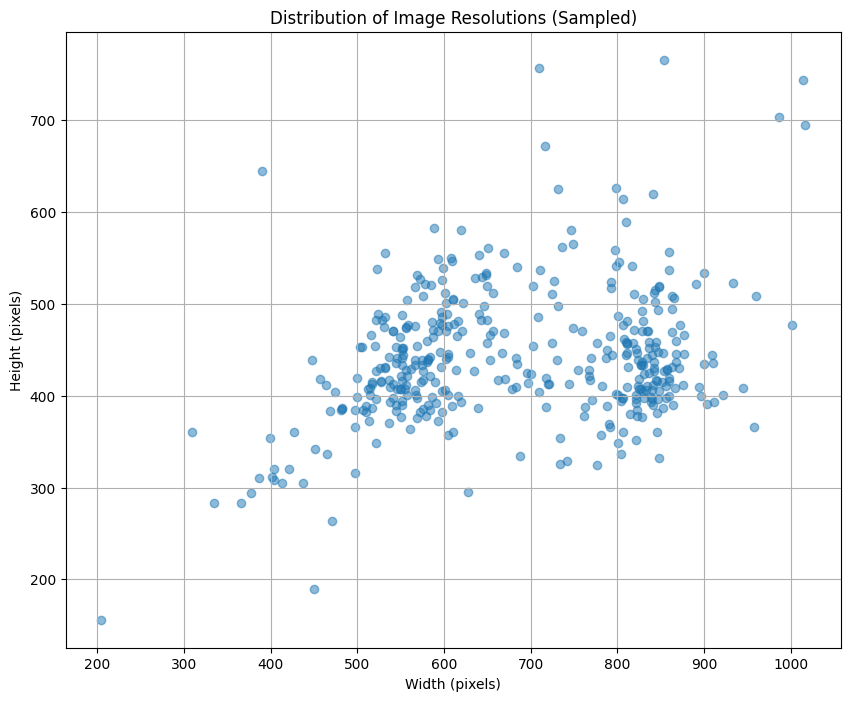


[분석 결과 3-3: 이미지 해상도 분포 그래프]
위에 'Distribution of Image Resolutions' 제목의 그래프가 나타납니다.


In [3]:
from PIL import Image
import random

print("\nStep 3: 이미지 속성 분석을 시작합니다 (샘플링).")

image_properties = []
if 'class_names' in locals() and os.path.exists(TRAIN_DATA_PATH):
    print("각 클래스에서 이미지 1장씩을 샘플링하여 분석 중입니다. 잠시 기다려주세요...")
    for class_name in class_names:
        class_path = os.path.join(TRAIN_DATA_PATH, class_name)
        images_in_class = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        
        if not images_in_class:
            continue
            
        # 각 클래스에서 랜덤으로 이미지 하나 선택
        sample_image_name = random.choice(images_in_class)
        sample_image_path = os.path.join(class_path, sample_image_name)
        
        try:
            with Image.open(sample_image_path) as img:
                width, height = img.size
                aspect_ratio = width / height if height > 0 else 0
                mode = img.mode # 'RGB', 'L'(grayscale) 등
                image_properties.append({
                    'class_name': class_name,
                    'width': width,
                    'height': height,
                    'aspect_ratio': aspect_ratio,
                    'mode': mode
                })
        except Exception as e:
            print(f"!!! {sample_image_path} 파일을 여는 중 오류 발생: {e}")

    prop_df = pd.DataFrame(image_properties)

    print("\n[분석 결과 3-1: 이미지 해상도 통계]")
    print(prop_df[['width', 'height', 'aspect_ratio']].describe())

    print("\n[분석 결과 3-2: 이미지 컬러 모드 분포]")
    print(prop_df['mode'].value_counts())
    
    # 해상도 분포 시각화
    plt.figure(figsize=(10, 8))
    plt.scatter(prop_df['width'], prop_df['height'], alpha=0.5)
    plt.title('Distribution of Image Resolutions (Sampled)')
    plt.xlabel('Width (pixels)')
    plt.ylabel('Height (pixels)')
    plt.grid(True)
    plt.show()

    print("\n[분석 결과 3-3: 이미지 해상도 분포 그래프]")
    print("위에 'Distribution of Image Resolutions' 제목의 그래프가 나타납니다.")

else:
    print("!!! 1단계 코드를 먼저 실행해주세요.")